# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Undissya Putri Maharani
- **Email:** undissyaputri@gmail.com
- **ID Dicoding:** undissya_putri

## Menentukan Pertanyaan Bisnis

- Which season has the most customers? And can you show the trend for each weather?
- How does the comparison between the number of casual users and registered users differ between holidays and working days?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import dataset
day_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/data/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/data/hour.csv')

In [ ]:
# Peek the dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Peek the dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
# Check the information
print("Dataset size:", day_df.shape)
print("Dataset info:")
print(day_df.info())

Dataset size: (731, 16)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
# Check the information
print("Dataset size:", hour_df.shape)
print("Dataset info:")
print(hour_df.info())

Dataset size: (17379, 17)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [ ]:
# Check missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Check missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Check the duplicated data
day_df.duplicated().sum()

0

In [ ]:
# Check the duplicated data
hour_df.duplicated().sum()

0

### Cleaning Data

**Missing Value and Duplicate Data**

All of the dataset is clean from the missing value and duplicated data. We don't need to drop nor imputation on both dataset.

**Data Type Validation**

Apart from "dteday", the data types are appropriate. We need to change the type of "dteday" from string into datetime.

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
day_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [ ]:
hour_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Data Outlier

Since we want to analyze "season" and "month," we need to check and clean the outliers.

In [ ]:
# Define the label
season_label = ['Spring', 'Summer', 'Fall', 'Winter']
colors = ['green', 'purple', 'red', 'blue']

<ipython-input-305-979cd700c268>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='mnth', data=day_df, palette=colors)


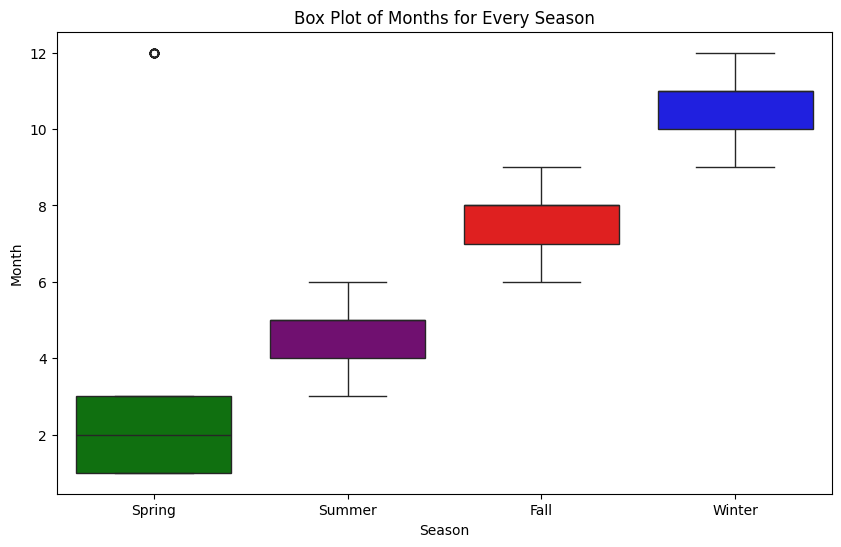

In [ ]:
# Check the outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='mnth', data=day_df, palette=colors)
plt.title('Box Plot of Months for Every Season')
plt.xlabel('Season')
plt.xticks(ticks=range(4), labels=season_label)
plt.ylabel('Month')
plt.show()

In [ ]:
# Check the outlier
outlier_index = day_df[(day_df['season'] == 1) & (day_df['mnth'] == 12)].index

In [ ]:
day_df.shape

(731, 16)

In [ ]:
# Check the size of the outliers
len(outlier_index)

22

Since the number of outliers is small, 3.01%, we can remove them.

In [ ]:
# Delete the outliers
cleaned_day_df = day_df.drop(outlier_index)

<ipython-input-310-41f0f52b4d93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='mnth', data=cleaned_day_df, palette=colors)


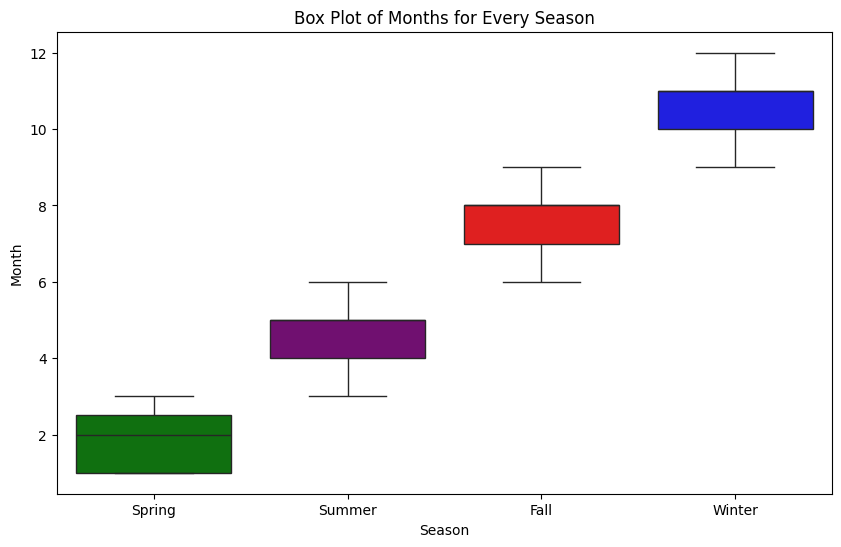

In [ ]:
# Check the outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='mnth', data=cleaned_day_df, palette=colors)
plt.title('Box Plot of Months for Every Season')
plt.xlabel('Season')
plt.xticks(ticks=range(4), labels=season_label)
plt.ylabel('Month')
plt.show()

## Exploratory Data Analysis (EDA)

In [ ]:
# Check the correlation using pearson
cleaned_day_df.corr(method='pearson')

<ipython-input-311-86243ce4ad25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_day_df.corr(method='pearson')


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.471083,0.872516,0.485217,0.006978,-0.000030,0.003582,-0.043428,0.192522,0.197128,0.016787,-0.134817,0.306164,0.732338,0.700748
season,0.471083,1.000000,-0.001988,0.962816,0.005445,0.002797,0.004306,0.032247,0.303738,0.312126,0.216926,-0.228910,0.183838,0.380013,0.372647
yr,0.872516,-0.001988,1.000000,-0.001824,0.008500,-0.001402,0.000952,-0.065995,0.056102,0.056339,-0.111489,-0.022040,0.254847,0.623756,0.594709
mnth,0.485217,0.962816,-0.001824,1.000000,0.000919,0.002893,0.004208,0.031774,0.290586,0.300034,0.230032,-0.237534,0.171516,0.382888,0.370509
holiday,0.006978,0.005445,0.008500,0.000919,1.000000,-0.095103,-0.245776,-0.038999,-0.018064,-0.022327,-0.015677,0.005227,0.063974,-0.091148,-0.050316
weekday,-0.000030,0.002797,-0.001402,0.002893,-0.095103,1.000000,0.034196,0.031343,0.001194,-0.005986,-0.053307,0.006937,0.065462,0.059122,0.071300
workingday,0.003582,0.004306,0.000952,0.004208,-0.245776,0.034196,1.000000,0.048947,0.046721,0.045674,0.015468,-0.015020,-0.536271,0.301014,0.048690
weathersit,-0.043428,0.032247,-0.065995,0.031774,-0.038999,0.031343,0.048947,1.000000,-0.114554,-0.114996,0.589321,0.040927,-0.244919,-0.261834,-0.299504
temp,0.192522,0.303738,0.056102,0.290586,-0.018064,0.001194,0.046721,-0.114554,1.000000,0.991527,0.131078,-0.154639,0.532688,0.520782,0.612172
atemp,0.197128,0.312126,0.056339,0.300034,-0.022327,-0.005986,0.045674,-0.114996,0.991527,1.000000,0.143781,-0.178364,0.533289,0.524808,0.615633


<ipython-input-312-903e4040eaa7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(cleaned_day_df.corr(), annot = True, cmap=colormap)


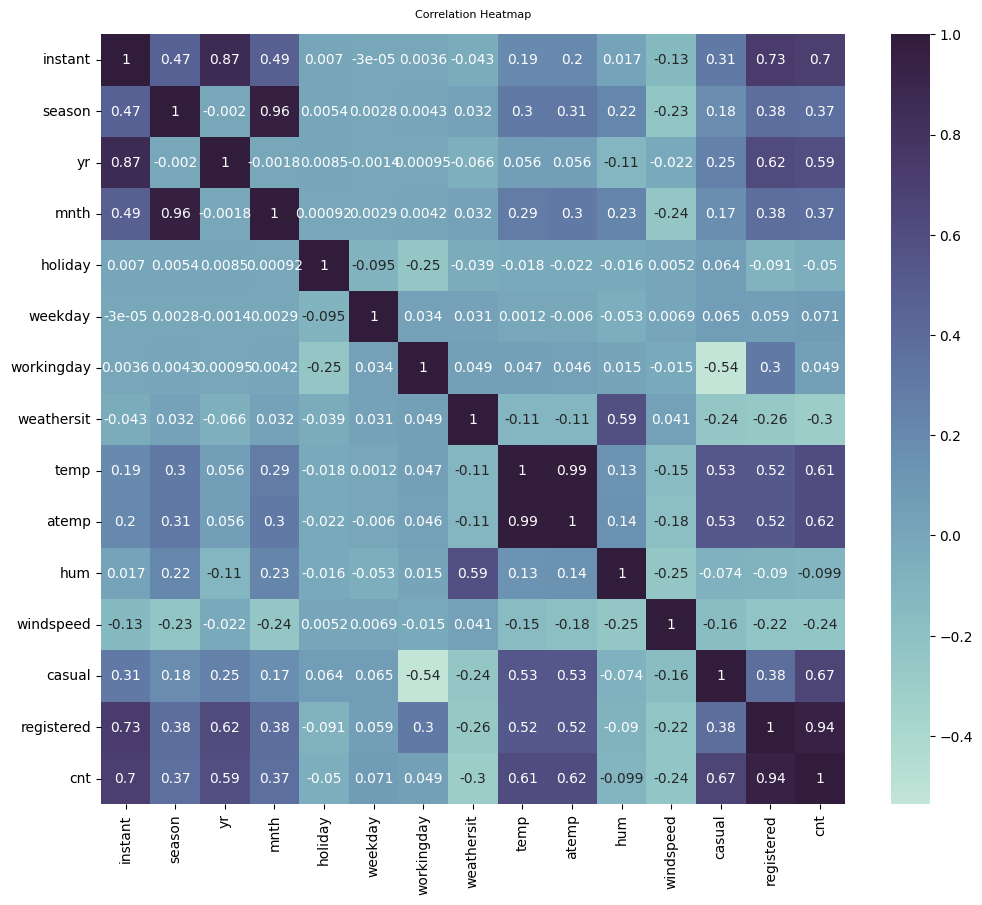

In [ ]:
# Make a visualization using heatmap
plt.figure(figsize=(12, 10))
colormap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
heatmap = sns.heatmap(cleaned_day_df.corr(), annot = True, cmap=colormap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12);

From this insight, we know that we can further analyze the season because of the fairly good correlation.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which season has the most customers? And can you show the trend for each weather?



In [ ]:
# Calculate the average bike rental and group by season
average_rental = cleaned_day_df.groupby('season')['cnt'].mean().reset_index()

Because when looking at each day, it's still very detailed, making it difficult to gain insights. Therefore, I took the average for each day.

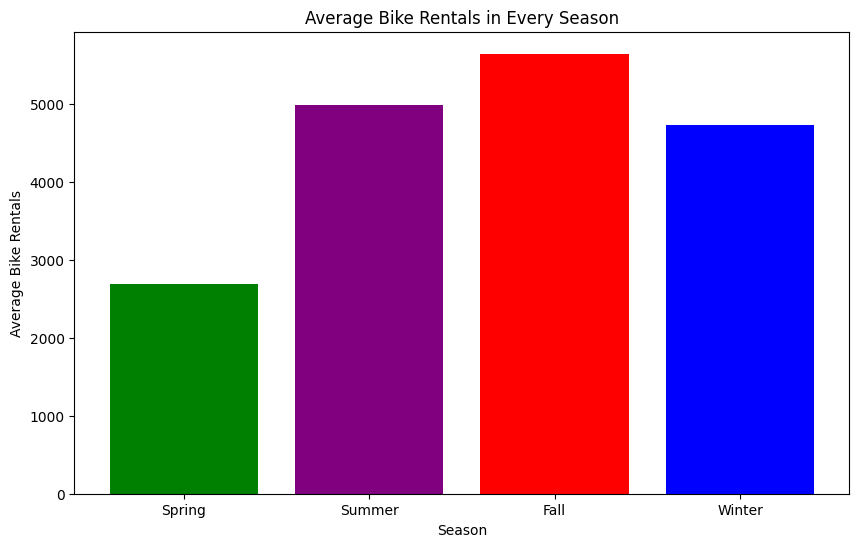

In [ ]:
# Visualization using bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_rental['season'], average_rental['cnt'], color=colors)
plt.title('Average Bike Rentals in Every Season')
plt.xticks(average_rental['season'], season_label)
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.show()

So, fall is the most favorite season for customers to rent bikes.

In [ ]:
# Change the group the average rental by month
average_rental_per_month = cleaned_day_df.groupby(['season', 'mnth'])['cnt'].mean().reset_index()

To get a clearer view of bike rental trends within a season, I performed grouping by month.

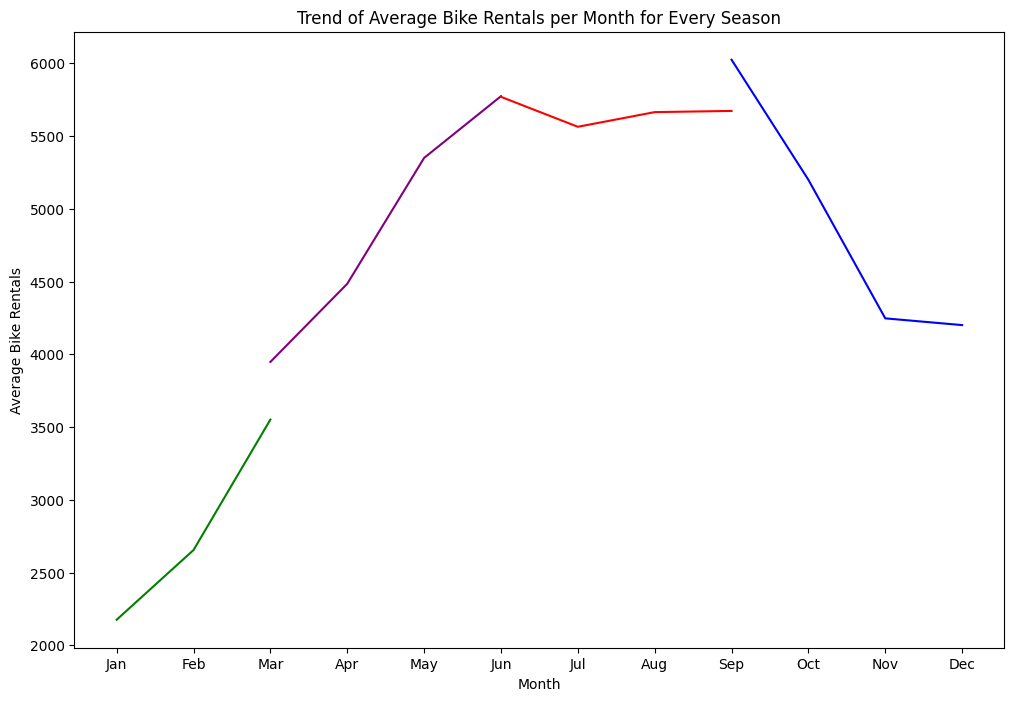

In [ ]:
# Visualize using line
plt.figure(figsize=(12, 8))
plt.title('Trend of Average Bike Rentals per Month for Every Season')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for season_code, color, label in zip(range(1, 5), colors, season_label):
    subset = average_rental_per_month[average_rental_per_month['season'] == season_code]
    plt.plot(subset['mnth'], subset['cnt'], label=label, color=color)

From the line chart above, we can observe that:


- Customers do not frequently rent bikes during the months of January to March or during the spring season.
- There is a significant increase in customers renting bikes from March to June. Therefore, during the summer, many people are active in using bikes.
- Customers from June to September are the most frequent bike renters. The number of customers remains relatively consistent throughout the season.
- There is a drastic decrease in bike rentals from September to December. During the winter season, there are not many people engaged in biking activities.

### Pertanyaan 2: How does the comparison between the number of casual users and registered users differ between holidays and working days?

In [ ]:
# Check the number of users in each days
total_casual_holidays = cleaned_day_df[cleaned_day_df['holiday'] == 1]['casual'].sum()
total_registered_holidays = cleaned_day_df[cleaned_day_df['holiday'] == 1]['registered'].sum()

total_casual_workingdays = cleaned_day_df[cleaned_day_df['workingday'] == 1]['casual'].sum()
total_registered_workingdays = cleaned_day_df[cleaned_day_df['workingday'] == 1]['registered'].sum()

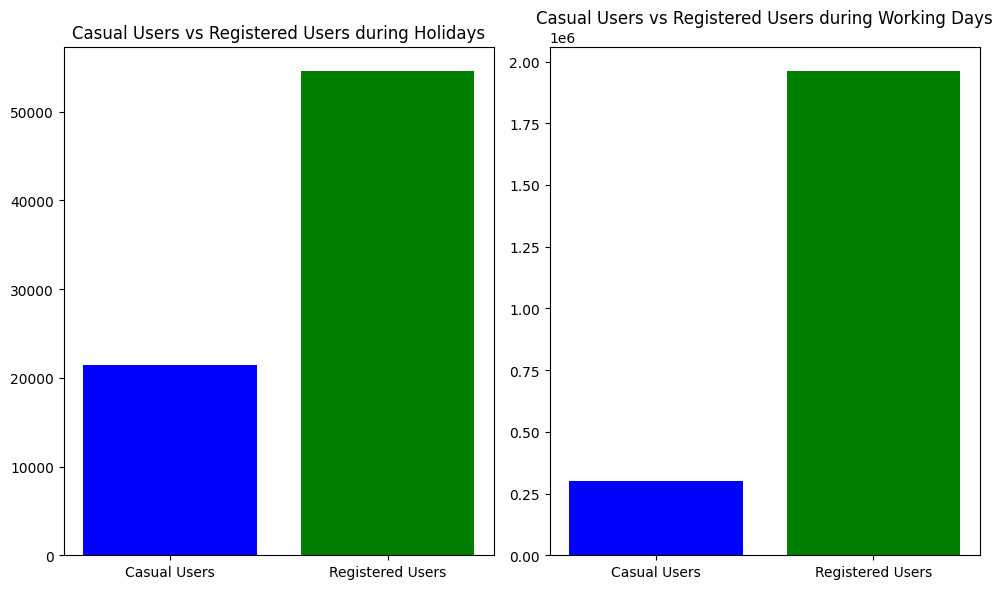

In [ ]:
# Visualize using bar chart
plt.figure(figsize=(10, 6))

# Plot for holidays
plt.subplot(1, 2, 1)
plt.bar(['Casual Users', 'Registered Users'], [total_casual_holidays, total_registered_holidays], color=['blue', 'green'])
plt.title('Casual Users vs Registered Users during Holidays')

# Plot for working days
plt.subplot(1, 2, 2)
plt.bar(['Casual Users', 'Registered Users'], [total_casual_workingdays, total_registered_workingdays], color=['blue', 'green'])
plt.title('Casual Users vs Registered Users during Working Days')

plt.tight_layout()
plt.show()


Based on the bar chart above, it can be seen that both on working days and holidays, the customers who rent bikes are already registered.

## Conclusion

Question 1: **Which season has the most customers? And can you show the trend for each weather?**


Many customers rent bikes during the fall season from June to September. Conversely, there are fewer bike rentals during the spring season from January to March. With this information, we can devise a good strategy for the months of June to September, taking into account the suitable weather and school holiday periods.

Question 2:
**How does the comparison between the number of casual users and registered users differ between holidays and working days?**

The comparison between user types during holidays and working days is very similar, dominated by registered users. Although many bike renters are already registered users, there are still more casual customers renting bikes on holidays compared to working days. This suggests the need for better regulation to encourage casual users to register, especially during holidays.